In [7]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter

from constants import *
from data_operations import *
from data_printing import *

In [8]:
#   * split the collected data into trips (data is stored in equally sized chunks)
#   * delete everything on the sd card to make room for new data
#   * print facts about the new trips

extractDataFromSD(BIKE_DATA_PATH)

['0_speed_acc.txt', '1_speed_acc.txt', '10_speed_acc.txt', '11_speed_acc.txt', '12_speed_acc.txt', '13_speed_acc.txt', '14_speed_acc.txt', '15_speed_acc.txt', '16_speed_acc.txt', '17_speed_acc.txt', '18_speed_acc.txt', '19_speed_acc.txt', '2_speed_acc.txt', '20_speed_acc.txt', '21_speed_acc.txt', '22_speed_acc.txt', '23_speed_acc.txt', '24_speed_acc.txt', '25_speed_acc.txt', '26_speed_acc.txt', '27_speed_acc.txt', '28_speed_acc.txt', '29_speed_acc.txt', '3_speed_acc.txt', '30_speed_acc.txt', '31_speed_acc.txt', '32_speed_acc.txt', '33_speed_acc.txt', '34_speed_acc.txt', '35_speed_acc.txt', '4_speed_acc.txt', '5_speed_acc.txt', '6_speed_acc.txt', '7_speed_acc.txt', '8_speed_acc.txt', '9_speed_acc.txt']
created:
['52_trip.txt', '53_trip.txt', '54_trip.txt', '55_trip.txt', '56_trip.txt', '57_trip.txt', '58_trip.txt', '59_trip.txt', '60_trip.txt', '61_trip.txt', '62_trip.txt', '63_trip.txt', '64_trip.txt', '65_trip.txt', '66_trip.txt', '67_trip.txt', '68_trip.txt', '69_trip.txt', '70_trip.

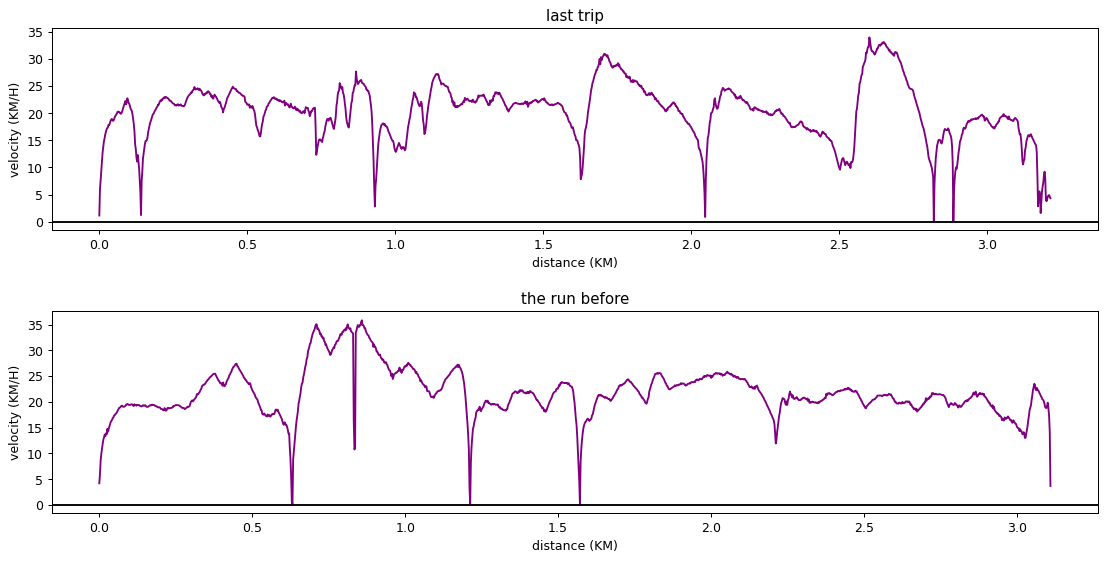

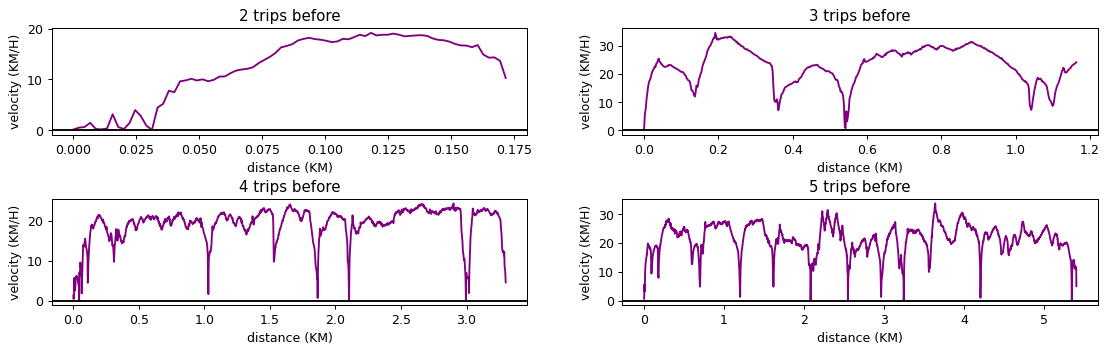

In [9]:
# run this to plot:
#   * the latest two trips speed evolution (big picture)
#   * 4 other trips speed evolution before them

FIGURE_COLS = 1
FIGURE_ROWS = 2

PAST_TRIPS_TO_SHOW = 4

TRIP_TO_SHOW = 2

tripFiles = os.listdir(TRIP_SAVE_LOCATION)
tripFiles.sort(reverse=True)


# big plot of the past two trips followed by small plots of 5 previous trips 
figure(figsize=(15, 7), dpi=90)
tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFiles[0])
velocityList = getVelocityList(tripCsv['detection time micros'])
velocityListLen = len(velocityList)


distanceList = np.linspace(0, velocityListLen, velocityListLen)
distanceList = [distMarker * (BIKE_WHEEL_PERIMETER_MM / MM_TO_KM) for distMarker in distanceList]

plt.subplot(FIGURE_ROWS, FIGURE_COLS, 1)
plt.plot(distanceList, velocityList, color="purple")
plt.xlabel("distance (KM)")
plt.ylabel("velocity (KM/H)")
plt.title("last trip")
plt.axhline(0, color="black")

tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFiles[1])
velocityList = getVelocityList(tripCsv['detection time micros'])
velocityListLen = len(velocityList)
distanceList = np.linspace(0, velocityListLen, velocityListLen)
distanceList = [distMarker * (BIKE_WHEEL_PERIMETER_MM / MM_TO_KM) for distMarker in distanceList]

plt.subplot(FIGURE_ROWS, FIGURE_COLS, 2)
plt.plot(distanceList, velocityList, color="purple")
plt.xlabel("distance (KM)")
plt.ylabel("velocity (KM/H)")
plt.title("the run before")
plt.axhline(0, color="black")

plt.subplots_adjust(hspace=0.4)
plt.show()


################# smaller plots
SUB_FIGURE_COLS = 2
SUB_FIGURE_ROWS = 2

figure(figsize=(15, 4), dpi=90)

for i in range(0, PAST_TRIPS_TO_SHOW):
    tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFiles[i + 2])
    velocityList = getVelocityList(tripCsv['detection time micros'])
    velocityListLen = len(velocityList)
    
    distanceList = np.linspace(0, velocityListLen, velocityListLen)
    distanceList = [distMarker * (BIKE_WHEEL_PERIMETER_MM / MM_TO_KM) for distMarker in distanceList]

    plt.subplot(SUB_FIGURE_ROWS, SUB_FIGURE_COLS, i + 1)
    plt.plot(distanceList, velocityList, color="purple")
    plt.xlabel("distance (KM)")
    plt.ylabel("velocity (KM/H)")
    plt.title(str(i + 2) + " trips before")
    plt.axhline(0, color="black")


plt.subplots_adjust(hspace=0.6)
plt.show()

	All time stats:
fastest speed:	98.97872709940961 KM/H
average speed:	13.03 KM/H

longest trip:	8.87 KM
total distance:	255.66 KM
avg distance:	3.24 KM
latest dists:	0.67, 2.94, 6.18, 6.23, 3.04, 3.0, 0.23, 0.48, 0.67, 1.15, 

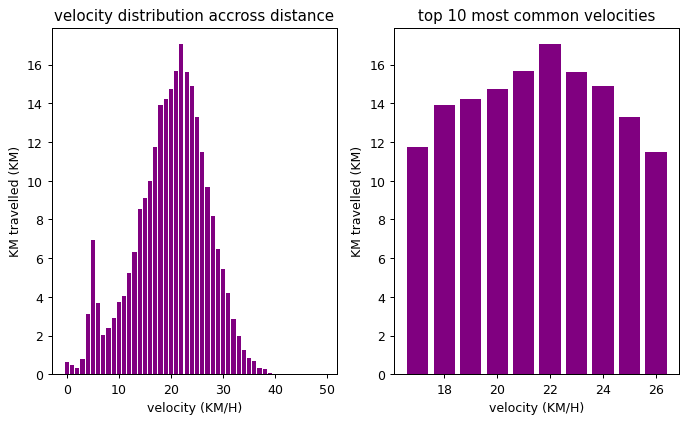

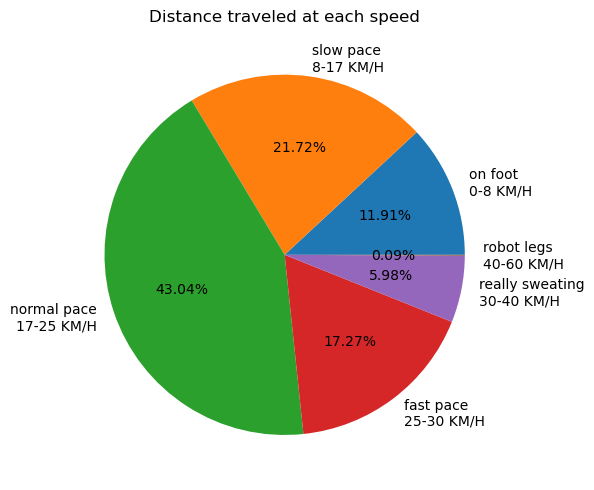

In [10]:
# show stats on all trips

# show most commons speeds (top 5?)
# do a pie chart of like 5 bins

 
print("\tAll time stats:")
tripFiles = os.listdir(TRIP_SAVE_LOCATION)
tripFiles.sort(reverse=True)

# tripFiles = os.listdir(TRIP_SAVE_LOCATION)

printTripData(getTripData(tripFiles))
# print("\n\n\tLast week stats")

velocityBins = [0, 8, 17, 25, 30, 40, 60]
binsLables = ["on foot\n0-8 KM/H", "slow pace\n8-17 KM/H", "normal pace\n17-25 KM/H", "fast pace\n25-30 KM/H", "really sweating\n30-40 KM/H", "robot legs\n40-60 KM/H"]

averageHistogram = np.zeros(len(binsLables))
speedCounter = Counter()
       
for tripFileName in tripFiles:
    tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFileName)
    velocityList = getVelocityList(tripCsv['detection time micros'])
    
    histogram, trash = np.histogram(velocityList,velocityBins)
    histogram = histogram/len(velocityList)
    averageHistogram += histogram
    speedCounter.update([round(speed, 0) for speed in velocityList])

figure(figsize=(9,5), dpi=90)
plt.subplot(1, 2, 1)
# patch for bigger problem
mostCommonSpeeds = np.array([speed for speed in speedCounter.most_common(len(speedCounter)) if speed[0] < 50])

plt.bar(mostCommonSpeeds[:, 0], mostCommonSpeeds[:, 1] * BIKE_WHEEL_PERIMETER_MM / MM_TO_KM, width=0.8, color="purple")
plt.title("velocity distribution accross distance")
plt.xlabel("velocity (KM/H)")
plt.ylabel("KM travelled (KM)")


plt.subplot(1, 2, 2)
mostCommonSpeeds = np.array(speedCounter.most_common(10))
plt.bar(mostCommonSpeeds[:, 0], mostCommonSpeeds[:, 1] * BIKE_WHEEL_PERIMETER_MM / MM_TO_KM, width=0.8, color="purple")
plt.title("top 10 most common velocities")
plt.xlabel("velocity (KM/H)")
plt.ylabel("KM travelled (KM)")
plt.show()

averageHistogram = averageHistogram / len(tripFiles)

figure(figsize=(6, 6), dpi=100)
plt.title("Distance traveled at each speed")
patches, labels, autotexts = plt.pie(averageHistogram, labels=binsLables, autopct='%1.2f%%')

# labels[0]._y += 0.1
# labels[4]._y -= 0.1

plt.tight_layout()


79


Text(0.5, 1.0, 'trip corelations')

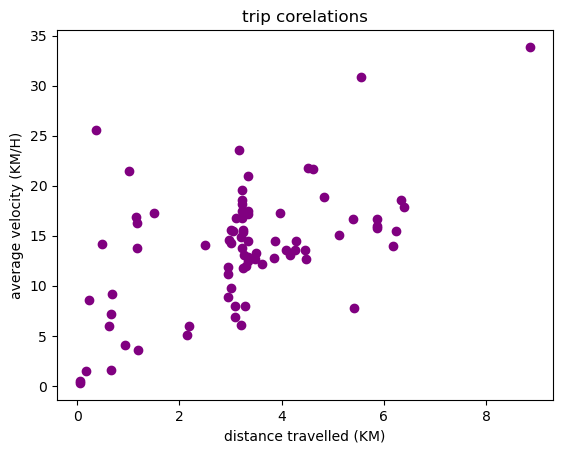

In [11]:
# run this to see corelations between trips
tripFiles = os.listdir(TRIP_SAVE_LOCATION)
print(len(tripFiles))
tripFiles.sort()

averageTripSpeed = []
tripDistance = []

for tripFileName in tripFiles:
    tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFileName)
    velocityList = getVelocityList(tripCsv['detection time micros'])
    timeList = tripCsv['detection time micros']
    timeListLen = len(timeList)

    tripDistance.append(timeListLen)
    averageTripSpeed.append(timeListLen * BIKE_WHEEL_PERIMETER_MM / timeList[timeListLen - 1] * MMPUS_TO_KMPH)

tripDistance = [dist * BIKE_WHEEL_PERIMETER_MM / MM_TO_KM for dist in tripDistance]

plt.scatter(tripDistance, averageTripSpeed, color="purple")
plt.ylabel("average velocity (KM/H)")
plt.xlabel("distance travelled (KM)")
plt.title("trip corelations")

27.679423976974448
33.977448635832644


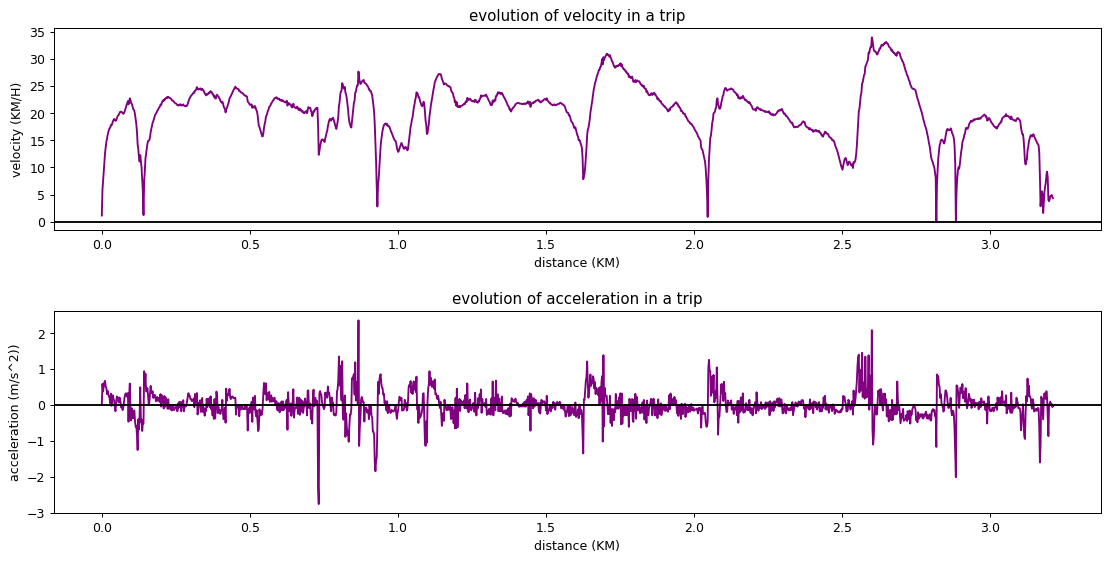

Total acceleration: 0.00021081785774516962


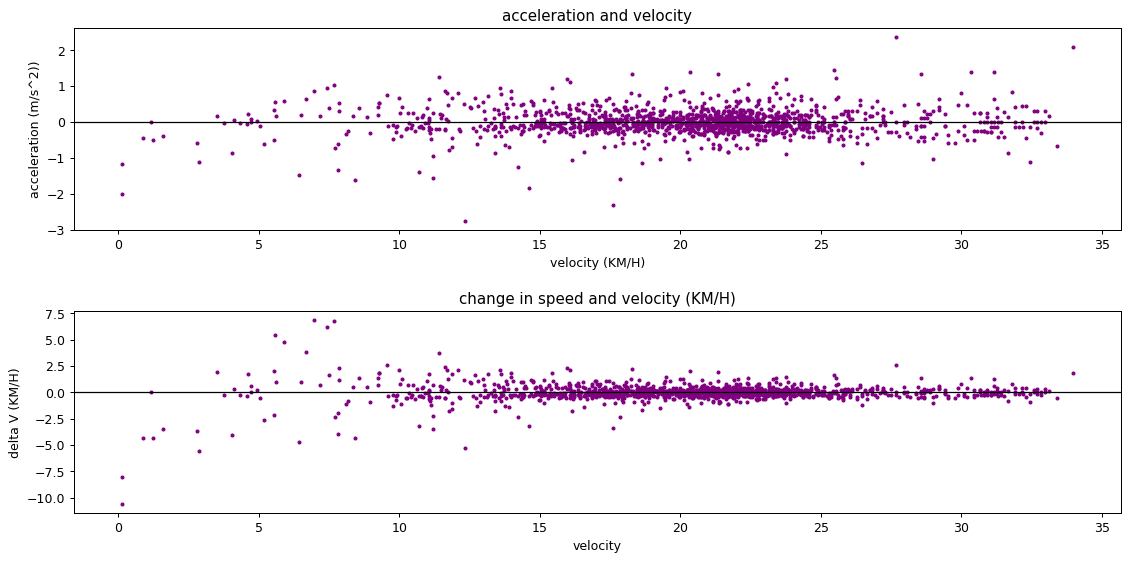

0.00021081785774516962


In [12]:
# run this to plot:
#   interesting things about the latest trip

TRIP_TO_SHOW = 0

tripFiles = os.listdir(TRIP_SAVE_LOCATION)
tripFiles.sort(reverse=True)

tripCsv = pd.read_csv(TRIP_SAVE_LOCATION + tripFiles[TRIP_TO_SHOW])
velocityList = getVelocityList(tripCsv['detection time micros'])
velocityListLen = len(velocityList)

deltaVelList = np.zeros(velocityListLen)
for i in range(1, velocityListLen):
    deltaVelList[i] = velocityList[i] - velocityList[i-1]

accList = [accVal * KMPH_TO_MPS/(2 * BIKE_WHEEL_PERIMETER_MM / MM_TO_M) for accVal in deltaVelList]
# accList = [accVal / 36 * 1000  / 36 / 2 / 7 / 2 / np.pi for accVal in accList]

accList[0] = 0 
for idx in range(1, len(accList)):
    accList[idx] *= (velocityList[idx] + velocityList[idx - 1]) * KMPH_TO_MPS
    
    if(accList[idx] > 2):
        print(velocityList[idx])
distanceList = np.linspace(0, len(accList), len(accList))
distanceList = [distMarker * (BIKE_WHEEL_PERIMETER_MM / MM_TO_KM) for distMarker in distanceList]


FIGURE_COLS = 1
FIGURE_ROWS = 2

# plt.subplot(FIGURE_ROWS, FIGURE_COLS, 1)
figure(figsize=(15, 7), dpi=90)
plt.subplot(FIGURE_ROWS, FIGURE_COLS, 1)
plt.plot(distanceList, velocityList, color="purple")
plt.xlabel("distance (KM)")
plt.ylabel("velocity (KM/H)")
plt.axhline(0, color="black")
plt.title("evolution of velocity in a trip")

plt.subplot(FIGURE_ROWS, FIGURE_COLS, 2)
plt.plot(distanceList, accList, color="purple")
plt.ylabel("acceleration (m/s^2))")
plt.xlabel("distance (KM)")
plt.title("evolution of acceleration in a trip")
plt.axhline(0, color="black")
# plt.axhline(5, color="red")
# plt.axhline(2.5, color="orange")

plt.subplots_adjust(hspace=0.4)
plt.show()


figure(figsize=(15, 7), dpi=90)
plt.subplot(FIGURE_ROWS, FIGURE_COLS, 1)
plt.scatter(velocityList, accList, s=5, color="purple")
plt.xlabel("velocity (KM/H)")
plt.ylabel("acceleration (m/s^2))")
plt.title("acceleration and velocity")
accAverage = sum(accList)/len(accList)
print("Total acceleration:", accAverage)
plt.axhline(y=accAverage, color='black', linewidth=1)

plt.subplot(FIGURE_ROWS, FIGURE_COLS, 2)
plt.scatter(velocityList, deltaVelList, s=5, color="purple")
plt.xlabel("velocity")
plt.ylabel("delta V (KM/H)")
plt.title("change in speed and velocity (KM/H)")
plt.axhline(y=0, color='black', linewidth=1)

plt.subplots_adjust(hspace=0.4)
plt.show()

# uncomment to plot acceleration and velocity graph again, but wider
# make every point a slightly different hue
figure(figsize=(15, 7), dpi=900)
plt.scatter(velocityList, accList, s=0.5, color="purple")
plt.xlabel("velocity (KM/H)")
plt.ylabel("acceleration (m/s^2))")
plt.title("the most interesting plot")
accAverage = sum(accList)/len(accList)
print(accAverage)
plt.axhline(y=accAverage, color='black', linewidth=1)
plt.show()
